In [1]:
import geopandas
import geoplot
import numpy as np
import pandas as pd
df = pd.read_csv('\\Users\\Carlos\\Desktop\\All_2017.csv')

In [2]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(21) 
#When a value is 0, that means all other values below are 0, so no need to show all 79 col

,Total,Percent
INSBRTS,89849,1.000000
ESCROW,89849,1.000000
INSBRDD,89849,1.000000
NECNAMB,89849,1.000000
CONSOLD,82876,0.922392
BRCENM,78661,0.875480
CBSA_DIV_NAMB,68019,0.757037
SIMS_ACQUIRED_DATE,38570,0.429276
CSANAMBR,24945,0.277632
MSANAMB,18818,0.209440


In [35]:
"""df1 = df[df["CNTRYNA"]=='United States'].loc[lambda x : x['STNAME'] == 'New York']
latlon = list(zip(df1.SIMS_LATITUDE, df1.SIMS_LONGITUDE))
boroughs = geopandas.read_file(
    geoplot.datasets.get_path('nyc_boroughs')
)"""
collisions = geopandas.read_file(
    geoplot.datasets.get_path('nyc_injurious_collisions')
)
ax = geoplot.kdeplot(
    df1, clip=boroughs.geometry,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(boroughs, ax=ax, zorder=1)

AttributeError: 'DataFrame' object has no attribute 'total_bounds'

<Figure size 576x432 with 0 Axes>

In [ ]:
from shapely.geometry import Point

collision_points = nyc_collisions_sample.apply(
    lambda srs: Point(float(srs['LONGITUDE']), float(srs['LATITUDE'])),
    axis='columns'
)
collision_points

import geopandas as gpd
nyc_collisions_sample_geocoded = gpd.GeoDataFrame(nyc_collisions_sample, geometry=collision_points)
nyc_collisions_sample_geocoded



combine lat lon into parentheses like collisions.geometry (LAT LON -- NO COMMA)
add city name column from all_2017 (either citybr  \ Cntynamb\ city2br) REVIEW DOC NOTES TO DETERMINE WHICH IS BEST. MIGHT BE CNTYNAMB
ALL2017.SELECT US. SELECT NY. SELECT 5 BOROUGHS

collisions geometry point because its a single entry
boroughs multipolygon because has multiple selections to cover wide range

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2611 entries, 798 to 88539
Data columns (total 79 columns):
YEAR                     2611 non-null int64
CERT                     2611 non-null int64
BRNUM                    2611 non-null int64
UNINUMBR                 2611 non-null int64
NAMEFULL                 2611 non-null object
ADDRESBR                 2611 non-null object
CITYBR                   2611 non-null object
CNTYNAMB                 2611 non-null object
STALPBR                  2611 non-null object
ZIPBR                    2611 non-null int64
BRCENM                   188 non-null object
CONSOLD                  59 non-null float64
BRSERTYP                 2611 non-null int64
DEPSUMBR                 2611 non-null object
BKMO                     2611 non-null int64
CBSA_DIV_NAMB            1097 non-null object
CITY2BR                  2611 non-null object
CNTRYNAB                 2611 non-null object
CNTYNUMB                 2611 non-null int64
CSABR                    2

In [33]:
df1['geometry'] = df1['SIMS_LONGITUDE'].astype(str) + ' ' +  df1['SIMS_LATITUDE'].astype(str)

In [37]:
df1['geometry'] = df1['geometry'].astype(geometry)

NameError: name 'geometry' is not defined

In [26]:
collisions['geometry']

0        POINT (-73.94268 40.67650)
1        POINT (-74.00834 40.72132)
2        POINT (-73.97076 40.68764)
3        POINT (-73.83874 40.88127)
4        POINT (-73.98873 40.59300)
                    ...            
20639    POINT (-73.98786 40.72270)
20640    POINT (-73.99766 40.63837)
20641    POINT (-73.95632 40.80312)
20642    POINT (-73.96255 40.71253)
20643    POINT (-73.95399 40.77882)
Name: geometry, Length: 20644, dtype: geometry

In [27]:
collisions

,id,NUMBER OF PERSONS INJURED,BOROUGH,geometry
0,11,1,BROOKLYN,POINT (-73.94268 40.67650)
1,21,1,MANHATTAN,POINT (-74.00834 40.72132)
2,27,1,BROOKLYN,POINT (-73.97076 40.68764)
3,28,1,BRONX,POINT (-73.83874 40.88127)
4,33,1,BROOKLYN,POINT (-73.98873 40.59300)
...,...,...,...,...
20639,920296,1,MANHATTAN,POINT (-73.98786 40.72270)
20640,920302,1,BROOKLYN,POINT (-73.99766 40.63837)
20641,920312,1,MANHATTAN,POINT (-73.95632 40.80312)
20642,920313,2,BROOKLYN,POINT (-73.96255 40.71253)


In [36]:
collisions.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20644 entries, 0 to 20643
Data columns (total 4 columns):
id                           20644 non-null object
NUMBER OF PERSONS INJURED    20644 non-null int64
BOROUGH                      20644 non-null object
geometry                     20644 non-null geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 645.2+ KB


In [18]:
boroughs

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330385.03697,1.623853e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,4,Queens,861038.47930,3.049947e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,3,Brooklyn,726568.94634,1.959432e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,1,Manhattan,358532.95642,6.364422e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2,Bronx,464517.89055,1.186804e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


In [11]:
boroughs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
BoroCode      5 non-null int64
BoroName      5 non-null object
Shape_Leng    5 non-null float64
Shape_Area    5 non-null float64
geometry      5 non-null geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 328.0+ bytes


In [13]:
collisions.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20644 entries, 0 to 20643
Data columns (total 4 columns):
id                           20644 non-null object
NUMBER OF PERSONS INJURED    20644 non-null int64
BOROUGH                      20644 non-null object
geometry                     20644 non-null geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 645.2+ KB


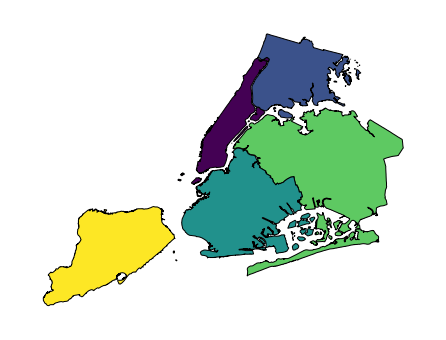

In [10]:
geoplot.choropleth(boroughs, hue = 'BoroCode')